# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [4]:
# How many countries are present?
# Code
df.country.nunique()

219

In [5]:
# What's the timespan of the data?
df.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [6]:
# Does each country have a row for every year present?
# Ans: NO
df1= df[['country','year']]
count = df1.groupby( [ "country"] ).count()
count.sort_values('year')

,year
country,
South Sudan,3
Curacao,4
"Bonaire, Saint Eustatius and Saba",4
Sint Maarten (Dutch part),4
Serbia,9
...,...
Greece,34
Greenland,34
Grenada,34


In [7]:
# Which countries are missing years?
df2=count.sort_values('year',ascending= True)
df2[df2['year']!=34]

,year
country,
South Sudan,3
Curacao,4
"Bonaire, Saint Eustatius and Saba",4
Sint Maarten (Dutch part),4
Serbia,9
Montenegro,9
Timor-Leste,12
Serbia & Montenegro,25
Netherlands Antilles,30


In [8]:
# How many rows have at least 1 non-null values across the columns 3-57?
df3=df.drop(['country','year'], axis=1)
df4=df3.notnull().sum(axis=1)
not_null_count=pd.DataFrame(df4)
not_null_count = not_null_count.rename(columns = {0 : 'non_null'})
not_null_count = not_null_count[not_null_count['non_null']!=0]
not_null_count.shape

(3484, 1)

## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [9]:
df.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Code
df5=df.melt(id_vars= {'country', 'year'}, var_name='diagnosis_methods', value_name='number of cases')
df5

,year,country,diagnosis_methods,number of cases
0,1980,Afghanistan,new_sp_m014,NaN
1,1981,Afghanistan,new_sp_m014,NaN
2,1982,Afghanistan,new_sp_m014,NaN
3,1983,Afghanistan,new_sp_m014,NaN
4,1984,Afghanistan,new_sp_m014,NaN
...,...,...,...,...
405435,2009,Zimbabwe,newrel_f65,NaN
405436,2010,Zimbabwe,newrel_f65,NaN
405437,2011,Zimbabwe,newrel_f65,NaN
405438,2012,Zimbabwe,newrel_f65,NaN


In [11]:
df5[['diagnosis_method','gender','age']] =df5['diagnosis_methods'].str.split(pat=r'(f|m)|/d', expand=True)
df5 = df5.drop(columns=['diagnosis_methods'])
df5

,year,country,number of cases,diagnosis_method,gender,age
0,1980,Afghanistan,NaN,new_sp_,m,014
1,1981,Afghanistan,NaN,new_sp_,m,014
2,1982,Afghanistan,NaN,new_sp_,m,014
3,1983,Afghanistan,NaN,new_sp_,m,014
4,1984,Afghanistan,NaN,new_sp_,m,014
...,...,...,...,...,...,...
405435,2009,Zimbabwe,NaN,newrel_,f,65
405436,2010,Zimbabwe,NaN,newrel_,f,65
405437,2011,Zimbabwe,NaN,newrel_,f,65
405438,2012,Zimbabwe,NaN,newrel_,f,65


In [12]:
df5['diagnosis_method'].unique()

array(['new_sp_', 'new_sn_', 'new_ep_', 'newrel_'], dtype=object)

In [13]:
df5 = df5.replace({'gender': {'m': 'male', 'f': 'female'},'diagnosis_method':{'new_sp_':'Pulmonary Smear (+)','newrel_':'Relapse','new_sn_':'Pulmonary Smear (-)','new_ep_':'Extrapulmonary'}})
df5

,year,country,number of cases,diagnosis_method,gender,age
0,1980,Afghanistan,NaN,Pulmonary Smear (+),male,014
1,1981,Afghanistan,NaN,Pulmonary Smear (+),male,014
2,1982,Afghanistan,NaN,Pulmonary Smear (+),male,014
3,1983,Afghanistan,NaN,Pulmonary Smear (+),male,014
4,1984,Afghanistan,NaN,Pulmonary Smear (+),male,014
...,...,...,...,...,...,...
405435,2009,Zimbabwe,NaN,Relapse,female,65
405436,2010,Zimbabwe,NaN,Relapse,female,65
405437,2011,Zimbabwe,NaN,Relapse,female,65
405438,2012,Zimbabwe,NaN,Relapse,female,65


In [14]:
df5['age'].unique()

array(['014', '1524', '2534', '3544', '4554', '5564', '65'], dtype=object)

In [15]:
df5 = df5.replace({'age': {'014': '0-14', '1524': '15-24','2534':'25-34','3544':'35-44','4554':'45-54','5564':'55-64'}})
df5

,year,country,number of cases,diagnosis_method,gender,age
0,1980,Afghanistan,NaN,Pulmonary Smear (+),male,0-14
1,1981,Afghanistan,NaN,Pulmonary Smear (+),male,0-14
2,1982,Afghanistan,NaN,Pulmonary Smear (+),male,0-14
3,1983,Afghanistan,NaN,Pulmonary Smear (+),male,0-14
4,1984,Afghanistan,NaN,Pulmonary Smear (+),male,0-14
...,...,...,...,...,...,...
405435,2009,Zimbabwe,NaN,Relapse,female,65
405436,2010,Zimbabwe,NaN,Relapse,female,65
405437,2011,Zimbabwe,NaN,Relapse,female,65
405438,2012,Zimbabwe,NaN,Relapse,female,65


## Question 3: Create a graph that shows when countries started to report TB cases.

In [17]:
# Code
#df5 = pd.DataFrame(df5)
df6 = df5.loc[df5['number of cases'] > 0]
df6

,year,country,number of cases,diagnosis_method,gender,age
18,1998,Afghanistan,30.0,Pulmonary Smear (+),male,0-14
19,1999,Afghanistan,8.0,Pulmonary Smear (+),male,0-14
20,2000,Afghanistan,52.0,Pulmonary Smear (+),male,0-14
21,2001,Afghanistan,129.0,Pulmonary Smear (+),male,0-14
22,2002,Afghanistan,90.0,Pulmonary Smear (+),male,0-14
...,...,...,...,...,...,...
405269,2013,Viet Nam,3110.0,Relapse,female,65
405303,2013,Wallis and Futuna Islands,2.0,Relapse,female,65
405371,2013,Yemen,360.0,Relapse,female,65
405405,2013,Zambia,669.0,Relapse,female,65


In [18]:
df6 = df6.drop(columns=['diagnosis_method','gender','age'])
df6

,year,country,number of cases
18,1998,Afghanistan,30.0
19,1999,Afghanistan,8.0
20,2000,Afghanistan,52.0
21,2001,Afghanistan,129.0
22,2002,Afghanistan,90.0
...,...,...,...
405269,2013,Viet Nam,3110.0
405303,2013,Wallis and Futuna Islands,2.0
405371,2013,Yemen,360.0
405405,2013,Zambia,669.0


In [29]:
df7 = df6.groupby(['country', 'year'])['number of cases'].min().reset_index()
df7 = df7.groupby('country').agg({'year': 'min'}).reset_index()
df7=df7.sort_values('year',ascending= True)
df7

,country,year
36,Canada,1980
47,Cook Islands,1980
124,Mongolia,1994
68,Fiji,1994
104,Lao People's Democratic Republic,1995
...,...,...
78,Greenland,2009
52,Curacao,2010
173,Sint Maarten (Dutch part),2010
179,South Sudan,2011


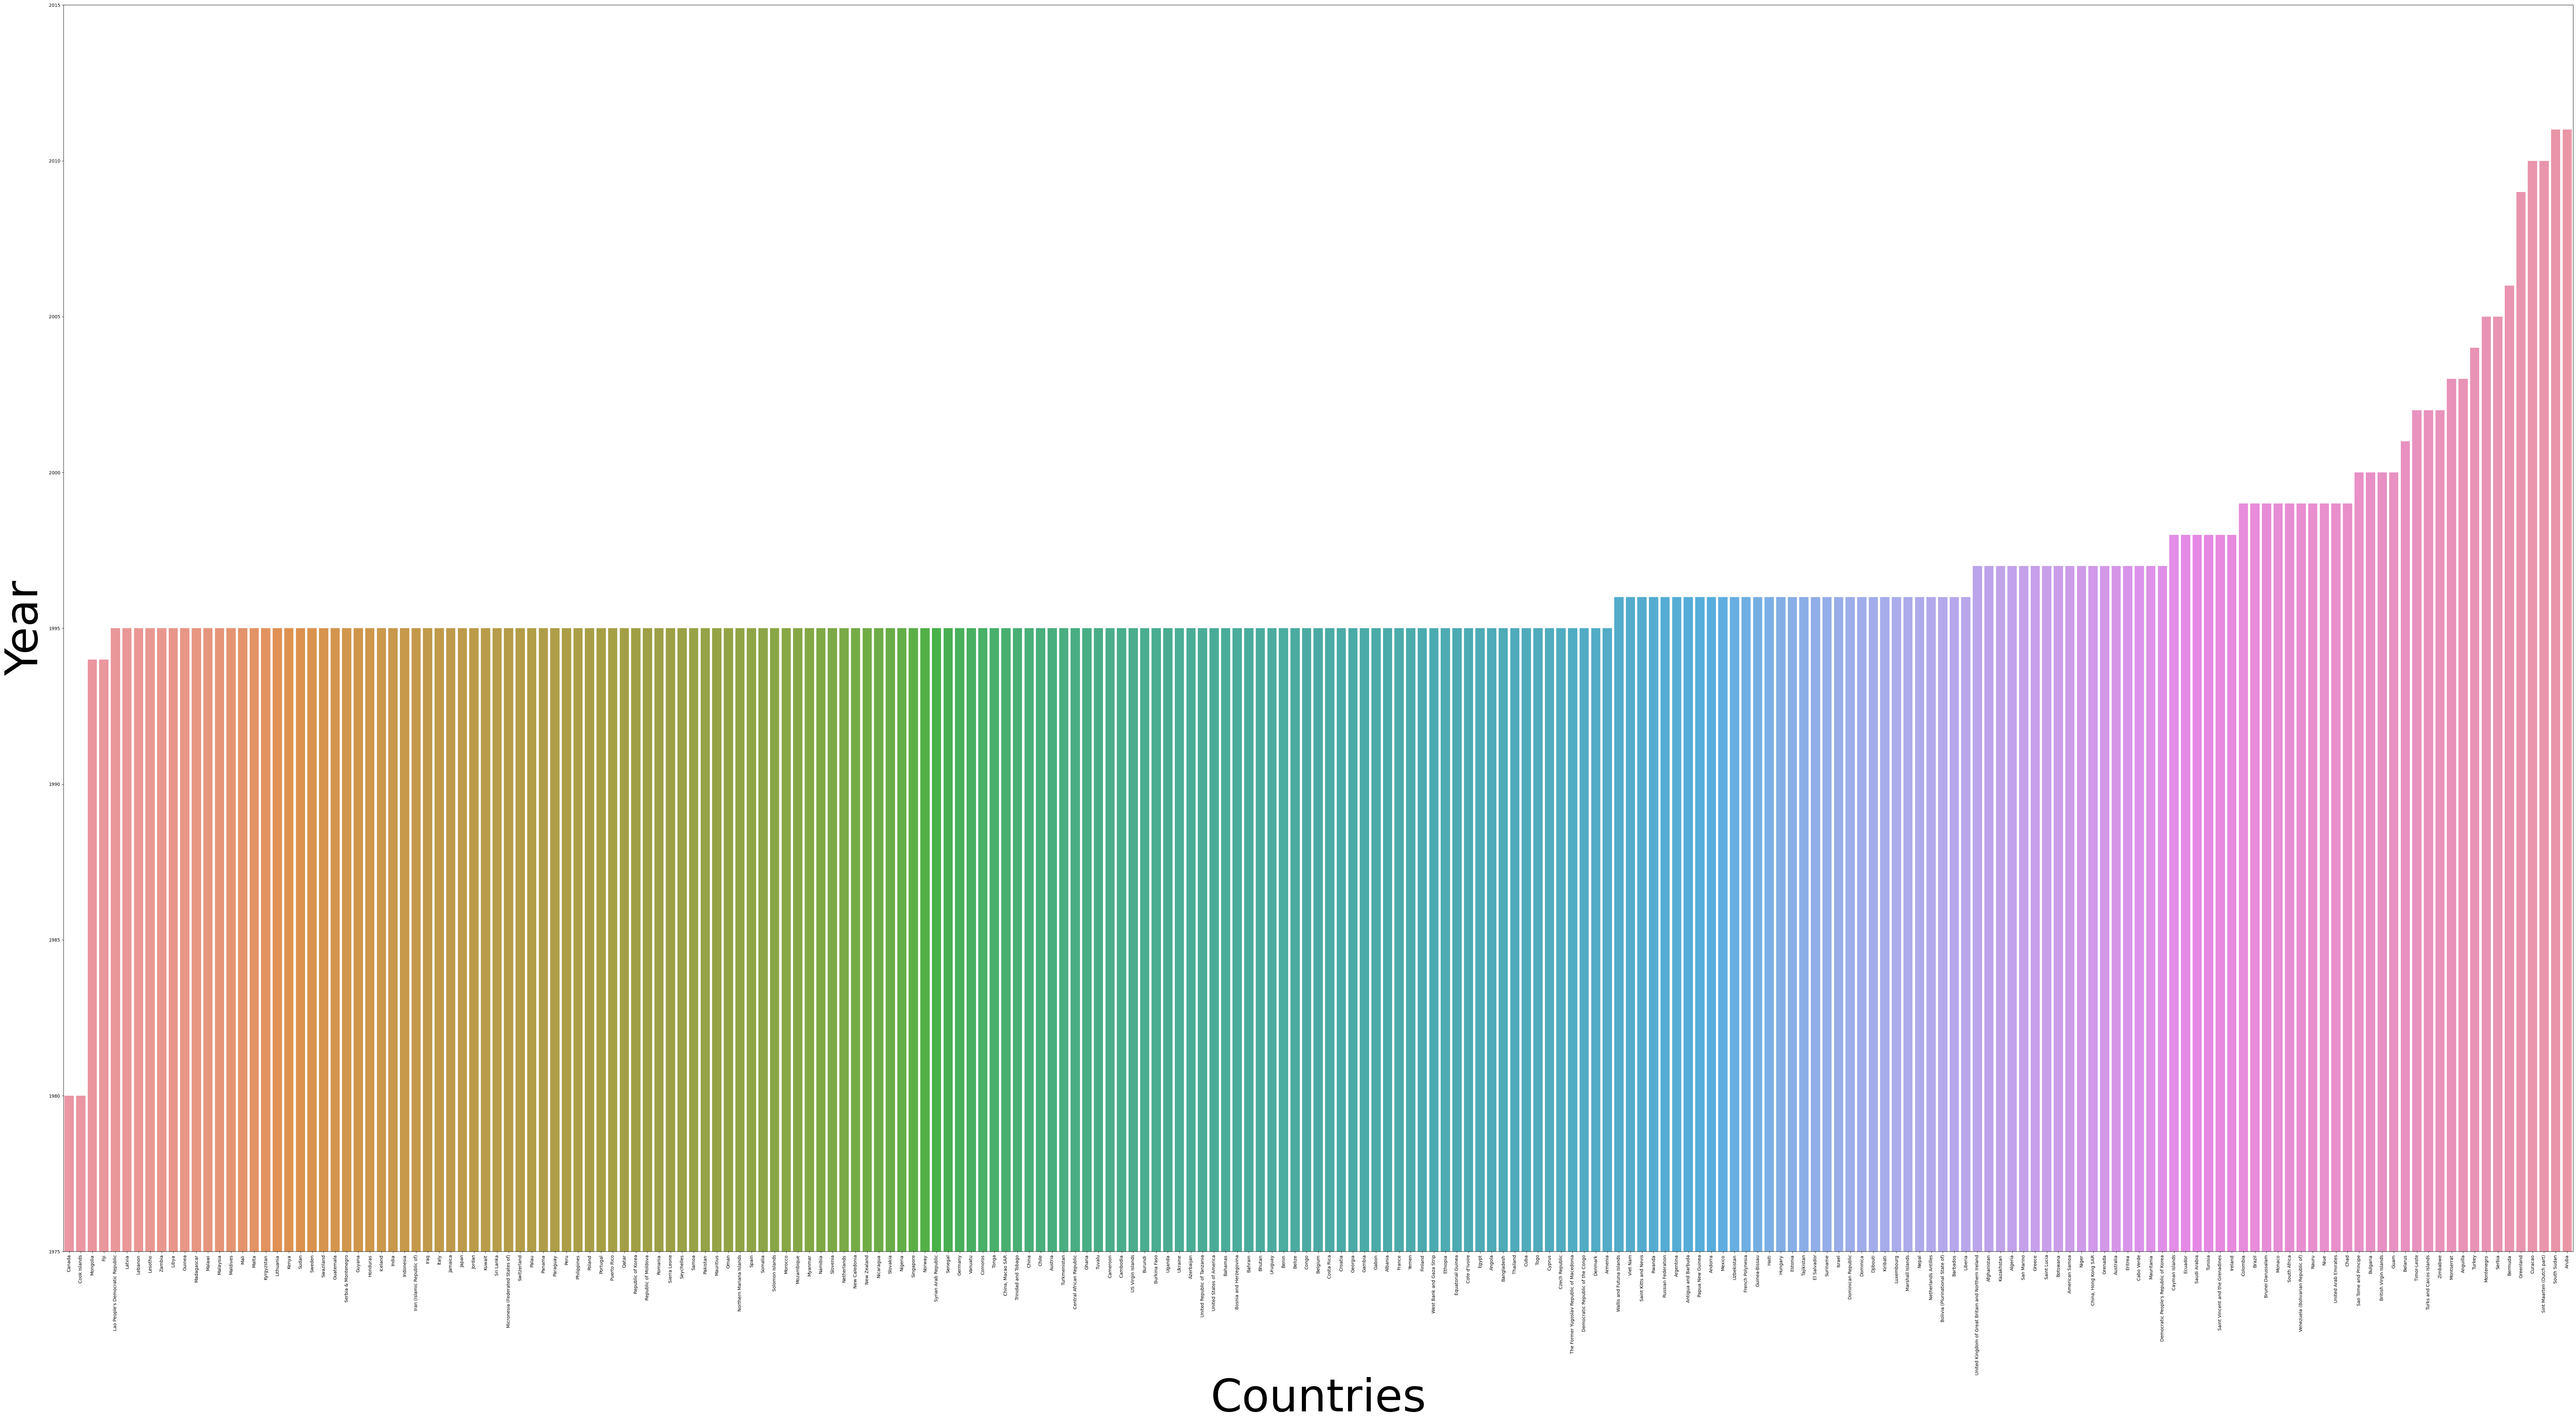

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(100, 50))
sns.barplot(x='country', y='year', data=df7)
plt.ylim(1975, 2015)
plt.xlabel('Countries', fontsize=100)
plt.ylabel('Year', fontsize=100)
plt.xticks(rotation=90)
plt.show()